C:\Users\jhiskard\Anaconda2\envs\tf\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.51608e-19): result may not be accurate.
  overwrite_a=True).T


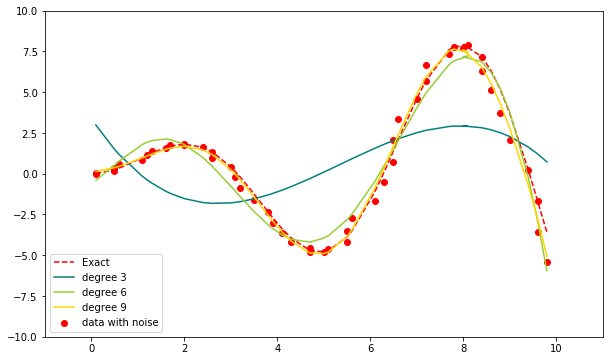

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Training data: Y=X*sin(X) with noise
X = []; Y = []
for x in np.linspace(0, 10, 51):
    noise = np.random.randint(-2, 2, 1)[0]/10.
    X.append([x+noise])
    noise = np.random.randint(-2, 2, 1)[0]/10.
    Y.append([x*np.sin(x)])

fig = plt.figure(figsize=(10,6))
fig1 = fig.add_subplot(111)
fig1.scatter(X, Y, color='red', label='data with noise')
fig1.plot(X, X*np.sin(X), 'r--', label='Exact')

colors = ['teal', 'yellowgreen', 'gold']
lw = 1.5

for count, degree in enumerate([3, 6, 9]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, Y)
    y_plot = model.predict(X)
    fig1.plot(X, y_plot, color=colors[count], linewidth=lw,
              label="degree %d" % degree)

fig1.axis([-1,11,-10, 10])
fig1.legend(loc='lower left')
plt.show()

## 